# Chapter 5 오차역전파법
* 신경망의 가중치 매개변수의 기울기(정확히는 가중치 매개변수에 대한 손실 함수의 기울기)는
* 수치 미분을 사용해 구함
* 수치 미분은 단순하고 구현하기도 쉽지만 계산 시간이 오래 걸린다는 게 단점
* 가중치 매개변수의 기울기를 효율적으로 계산하는 오차역전파법(backpropagation)을 배워야 한다.
* 오차역전파법을 이해하는 방법은 두가지
  - 수식을 통한 것(일반적인 방법)
  - 계산 그래프를 통한 것(시각적으로 이해하는 방법) 


## 5.1 계산 그래프
* 계산 그래프(computational graph)는 계산 과정을 그래프로 나타낸 것.
* 그래프는 그래프 자료구조로, 복수의 노드(node)와 에지(edge:노드사이의 직선)로 표현

### 5.1.1 계산  그래프로 풀다
* 계산 그래프에 익숙해지기
* 계산 그래프는 계산 과정을 노드와 화살표로 표현
* 노드은 원(O)으로 표기, 원안에 연산 내용 표기
* 계산 결과를 화살표 위에 적어 각 노드의 계산 결과가 왼쪽에서 오른쪽으로 전달한다.

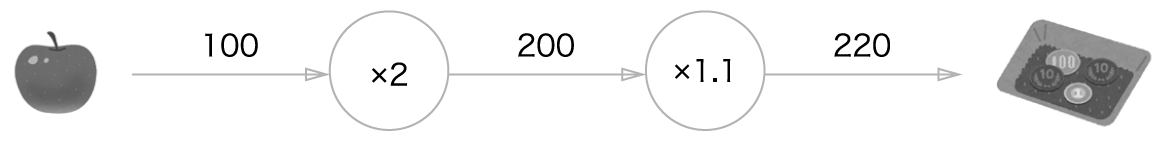

In [1]:
# 문제1 : 현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다.
# 이때 지불 금액을 구하세요. 단 소비세가 10% 부과됩니다.
# 그림 5-1 계산 그래프로 풀어본 문제 1의 답
from IPython.display import Image
Image("images/fig 5-1.png")

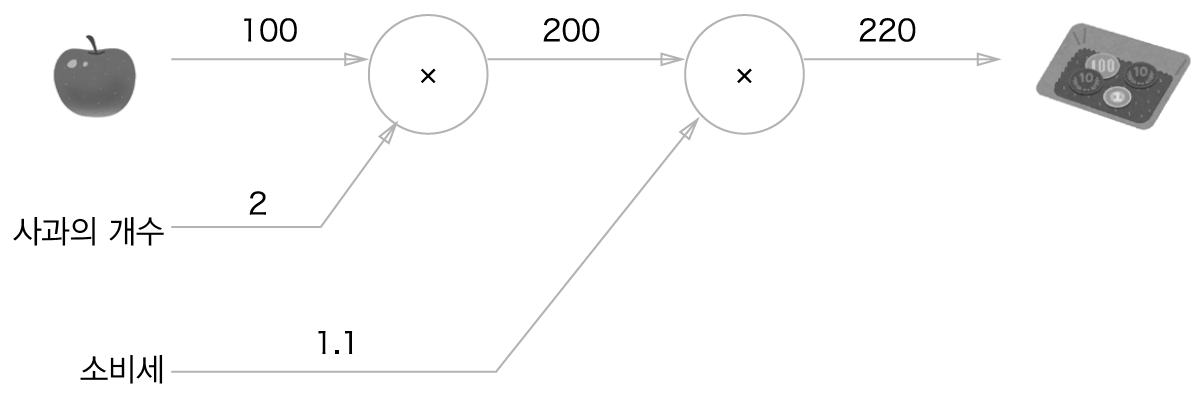

In [3]:
# 그림 5-2 계산 그래프로 풀어본 문제 1의 답:'사과의 개수와 소비세'를 변수로 취급해 원 밖에 표기
Image("images/fig 5-2.png")

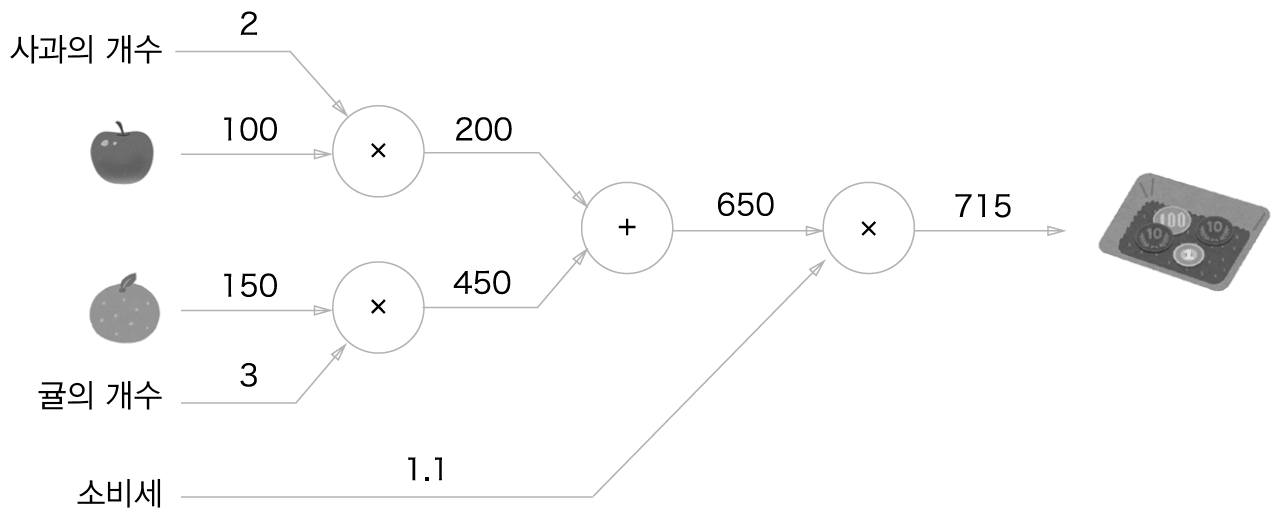

In [5]:
# 문제 2 : 현빈 군은 수퍼에서 사과를 2개, 귤을 3개 샀습니다.
#          사과는 1개에 100원, 귤은 1개 150원입니다.
#          소비세가 10%일때 지불 금액을 구하세요
# 그림 5-3 계산 그래프로 풀어본 문제2의 답
# 새롭게 덧셈 노드인 '+'가 등장했다.
Image("images/fig 5-3.png")

 ### 계산 그래프를 이용한 문제풀이는 다음 흐름으로 진행
 1. 계산 그래프를 구성한다.
 2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행한다.
 
 * 2번째 계산을 왼쪽에서 오른쪽으로 진행하는 단계를 순전파(forward propagation)
 * 순전파는 계산 그래프이 출발점부터 종착점으로의 전파입니다.
 * 반대 방향(오른쪽에서 왼쪽)의 전파를 역전파(backward propagation)라 한다.
 * 역전파는 미분을 계산할때 중요한 역할을 한다.
 

### 5.1.2 국소적 계산
* 계산 그래프의 특징은 '국소적 계산'을 전파함으로써 최종 결과를 얻는다는 점
* 국소적이란 '자신과 직접 관계된 작은 범위'라는 뜻
* 국소적 계산은 결국 전체에서 어떤 일이 벌어지든 상관없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 것

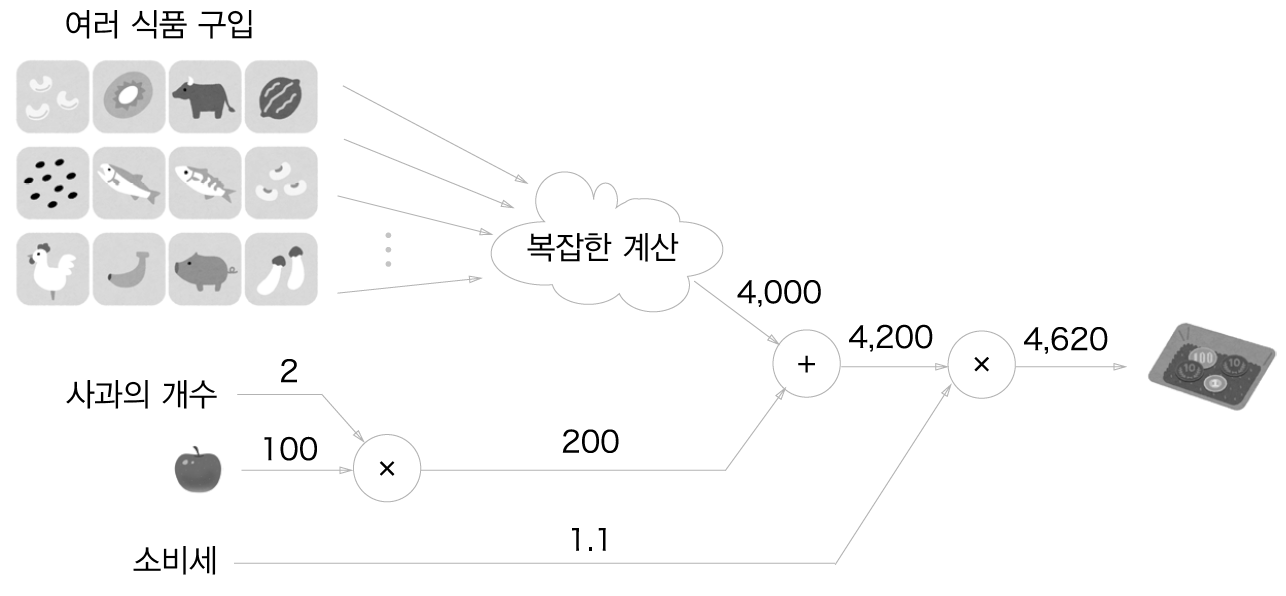

In [8]:
# 그림 5-4 사과2개를 포함해 여러 식품을 구입하는 예
# 여기에서 핵심은 각 노드에서의 계산은 국소적 계산이라는 점
# 즉 각 노드는 자신과 관련한 계산외에는 아무것도 신경 쓸 게 없다는 뜻
# 이처럼 계산 그래프는 국소적 계산에 집중합니다.
# 전체 계산이 제아무리 복잡하더라도 각 단계에서 하는 일은 해당 노드의 '국소적 계산'입니다.
Image("images/fig 5-4.png")

### 5.1.3 왜 계산 그래프로 푸는가?
* 계산 그래프의 이점은 무엇인가? 
  1. '국소적 계산'
  2. 계산 그래프는 중간 계산 결과를 모두 보관할 수 있습니다.
  3. 역전파를 통해 '미분'을 효율적으로 계산할 수 있는 점  

* 계산 그래프의 역전파를 설명하기 위해 문제 1 다시 보자
  - 사과 가격이 오르면 최종 금액에 어떤 영향을 끼치는지를 알고 싶다고 하자
  - 즉 '사과 가격에 대한 지불 금액의 미분(사과 가격의 변화량에 대한 지불 금액의 변화량)
  - x(사과값), L(지불 금액)이라 하자.
  - 다시 말해 이 미분값은 사과 값이 '아주 조금' 올랐을때 지불 금액이 얼마나 증가하느냐를 표시한 것
  - '사과 가격에 대한 지불 금액의 미분'값은 계산 그래프에서 역전파를 하면 구할 수 있다.

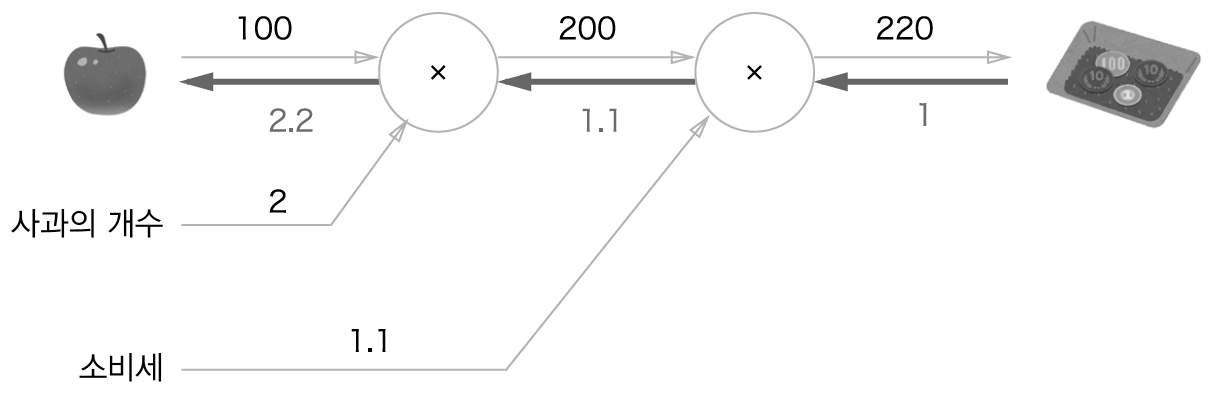

In [11]:
# 그림 5-5 역전파에 의한 미분 값의 전달
# 역전파는 순전파와는 반대 방향의 화살표(굵은 선)
# 이 전파는 '국소적 미분'을 전달하고 그 미분 값은 화살표의 아래에 적는다.
# 사과 값이 오르면 최종 금액은 사과 값의 2.2배만큼 오른다는 뜻
# 여기서는 사과 가격에 대한 미분을 구했지만 
# 소비세에 대한 지불 금액의 미분(소비세의 변화량에 따른 지불 금액의 변화량)
# 사과 개수에 대한 지불 금액의 미분(사과 개수의 변화량에 따른 지불 금액의 변화량)도 같은 순서로 구할 수 있다.
# 계산 그래프의 이점은 순전파와 역전파를 활용해서 각 변수의 미분을 효율적으로 구할 수 있다는 것 
Image("images/fig 5-5.png")

## 5.2 연쇄법칙
* 계산 그래프에서
  1. 순전파는 계산 결과를 왼쪽에서 오른쪽으로 전달하는 자연스럽게 느껴진다.
  2. 역전파는 '국소적인 미분'을 순방향과는 반대인 오른쪽에서 왼쪽으로 전달
  3. 이 '국소적 미분'을 전달하는 원리는 '연쇄법칙(chain rule)에 따른 것이다.

### 5.2.1 계산 그래프의 역전파
* y = f(x)라는 계산의 역전파를 확인해보자

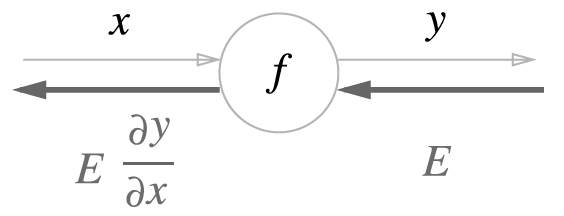

In [12]:
# 그림 5-6 계산 그래프의 역전파: 순방향과는 반대 방향으로 국소적 미분을 곱한다.
# 역전파의 계산 절차는 신호 E에 노드의 국소적 미분()을 곱한 후 다음 노드로 전달
# 여기서의 국소적 미분은 순전파 때의 y=f(x) 계산의 미분을 구한것이며
# 이는 x에 대한 y의 미분()을 구한다는 뜻
# 그리고 국소적인 미분을 상류에서 전달된 값(여기서는 E)에 곱해 앞쪽 노드로 전달하는 것
# 이것이 역전파의 계산 순서이고 이러한 방식을 따르면 목표로 하는 미분 값을 효율적으로
# 구할 수 있다는 것이  역전파의 핵심이다.
# 이것이 가능한가는 연쇄법칙의 원리로 설명할 수 있다.
# 그래서 다음에 연쇄법칙을 설명하려 한다.
Image("images/fig 5-6.png")

### 5.2.2 연쇄법칙이란?
* 연쇄법칙을 설명하려면 우선 합성 함수를 알아야 한다.
* 합성 함수란 여러 함수로 구성된 함수
* z = (x + y)**2

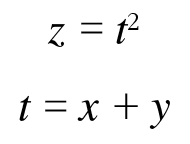

In [15]:
Image("images/e 5.1.png")
# 연쇄법칙은 합성 함수의 미분에 대한 성질이며, 다음과 같이 정의된다.
# 합성 함수의 미분은 합성 함수를 구성하는 각 함수의 미분의 곱으로 나타낼 수 있다.
# 이것이 연쇄법칙의 원리 

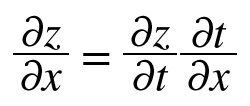

In [16]:
# (x에 대한 z의 미분) =  (t에 대한 z의 미분) * (x에 대한 t의 미분)
Image("images/e 5.2.png")

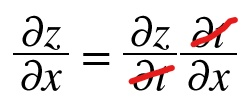

In [18]:
# 식 5.2는 마침 다음과 같이 (t)을 서로 지울 수 있다.
Image("images/e 5.1_1.jpg")

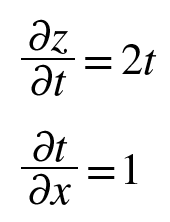

In [19]:
# 연쇄법칙을 써서 [식 5.2]의 미분을 구하면
Image("images/e 5.3.png")

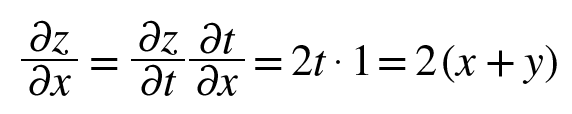

In [20]:
#최종적으로 구한 두 미분을 곱해 계산
Image("images/e 5.4.png")

### 5.2.3 연쇄법칙과 계산 그래프

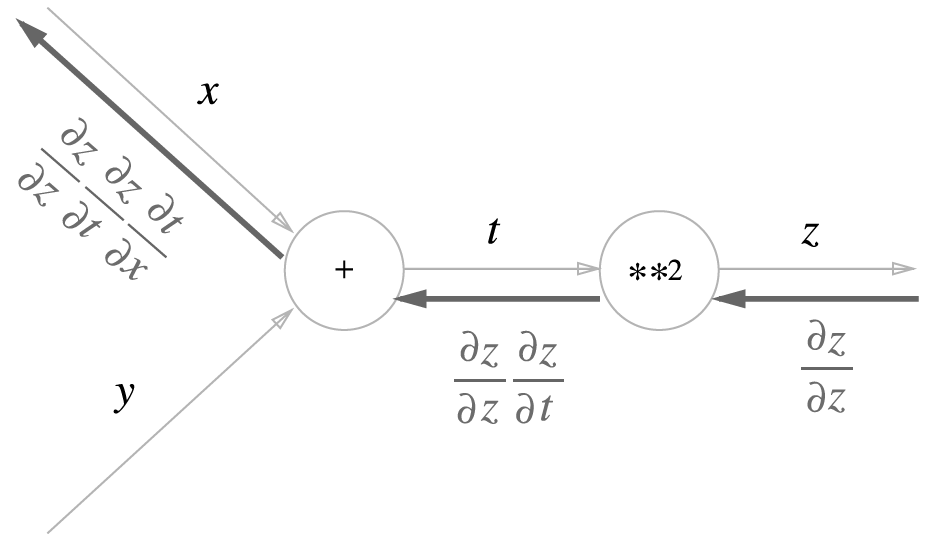

In [21]:
# 위 식을 연쇄법칙 계산을 계산 그래프로 표시
Image("images/fig 5-7.png")
# 순전파와는 반대 방향으로 국소적 미분을 곱하여 전달

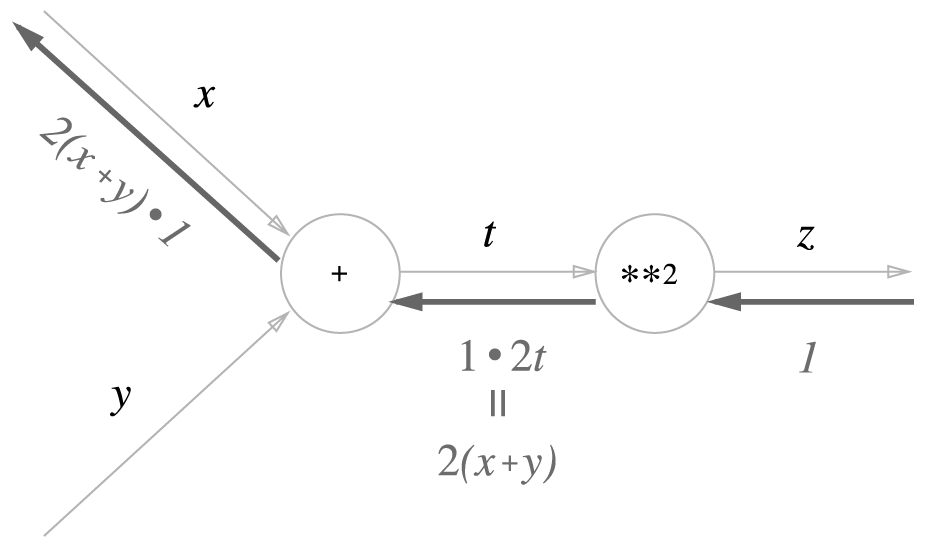

In [23]:
# [그림 5-7]에 [식 5.3]의 결과를 대입하면
Image("images/fig 5-8.png")

## 5.3 역전파
* 계산 그래프의 역전파가 연쇄법칙에 따라 진행됨
* '+', '-'등의 연산을 역전파의 구조로 설명


### 5.3.1 덧셈 노드의 역전파
* 덧샘 노드의 역전파
* z = x + y라는 식을 대상으로 역전파 살펴보기


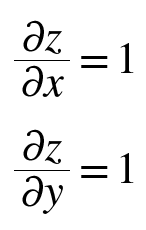

In [24]:
# z = x + y의 미분은 다음과 같은 해석적으로 계산
Image("images/e 5.5.png")

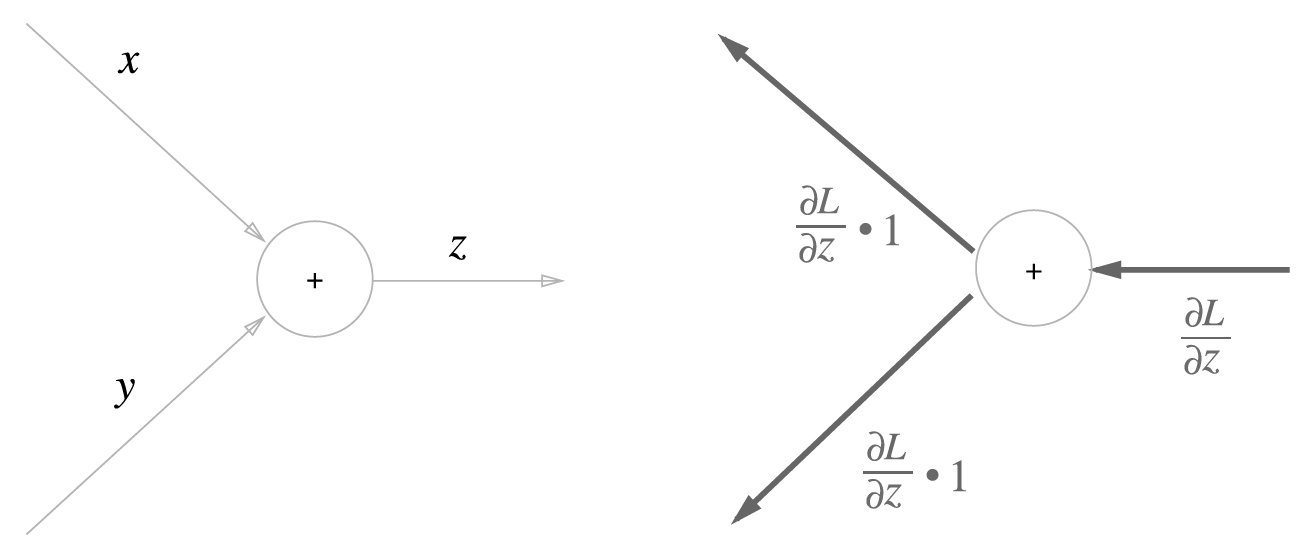

In [26]:
# 덧셈 노드의 역전파: 왼쪽이 순전파, 오른쪽이 역전파. 덧셈 노드의 역전파는 입력 값을 그대로 흘려보낸다
Image("images/fig 5-9.png")
# 역전파 때는 상류에서 전해진 미분()에 1을 곱하여 하류로 보낸다.
# 즉, 덧셈 노드이 역전파는 상류값에 1을 곱하여 하류로 전달 
# 입력된 값을 그대로 다음 노드로 보냄 

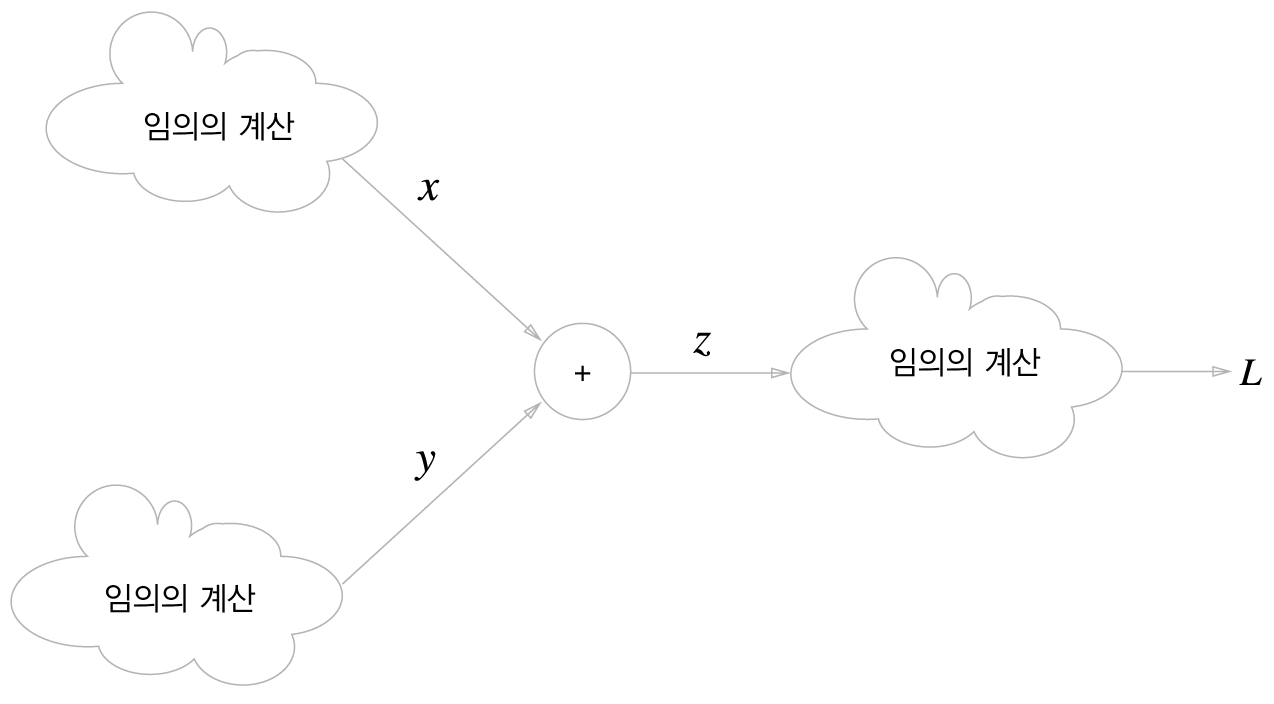

In [27]:
# 그림 5-10 최종 출력으로 가는 계산의 중간에 덧셈 노드 표현
# 역전파에서는 국소적 미분이 가장 오른쪽의 출력에서 시작하여 노드를 타고 역방향(왼쪽)으로 전파
Image("images/fig 5-10.png")

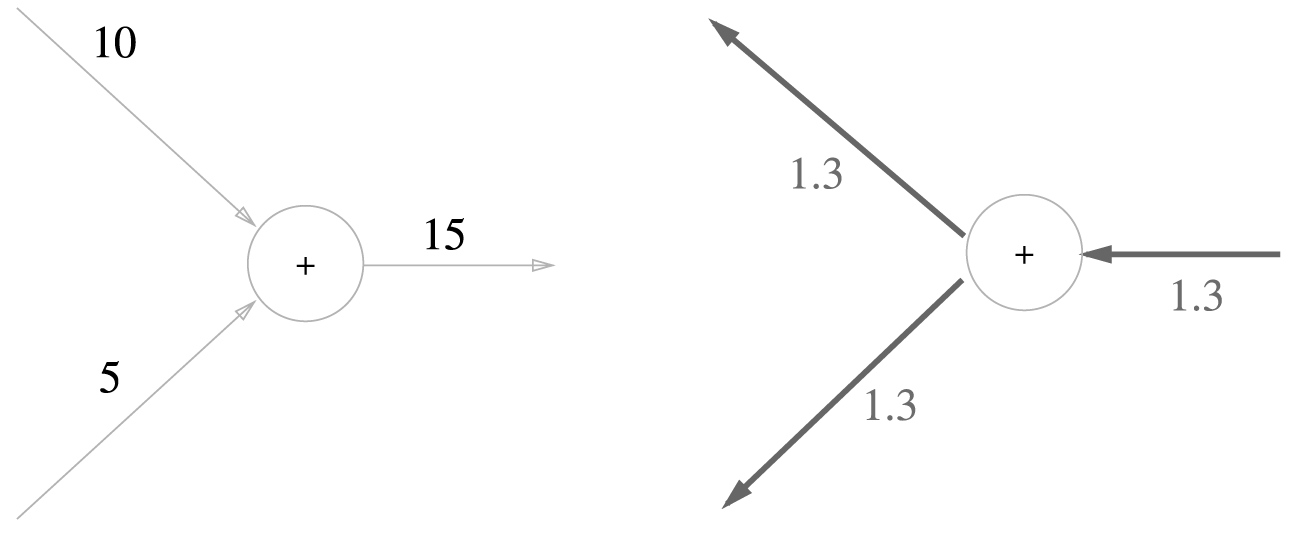

In [28]:
# 덧셈 노드 역전파의 구체적인 예
Image("images/fig 5-11.png")
#아래 예는 '10 + 5 = 15'라는 계산이 있고, 상류에서 1.3이라는 값이 전달된다.
# 즉 덧셈 노드 역전파는 입력 신호를 다음 노드로 출력 
# 그래서 1.3을 그래도 다음 노드로 전달 

### 5.3.2 곱셈 노드의 역전파
* 곱셈 노드의 역전파
* 예로 z = xy라는 식사용

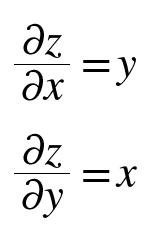

In [29]:
# z = xy의 미분은 
Image("images/e 5.6.png")

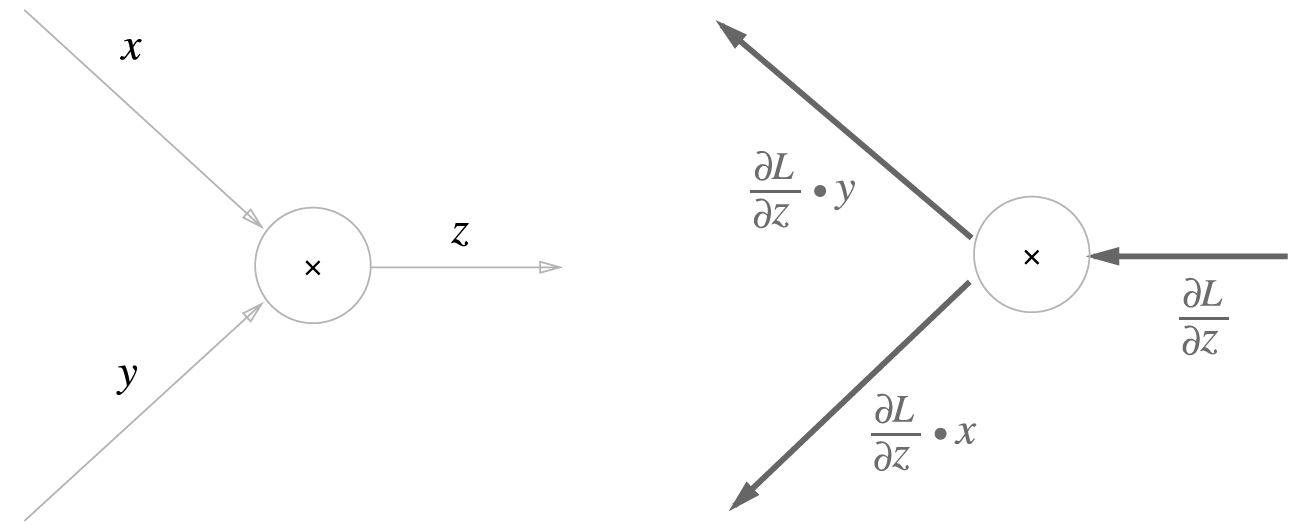

In [30]:
# 그림 5-12 곱셈 노드의 역전파
Image("images/fig 5-12.png")
# 곱셈 노드 역전파는 상류의 값에 순전파 때의 입력 신호들을 '서로 바꾼 값'을 곱해서 하류로 전달 

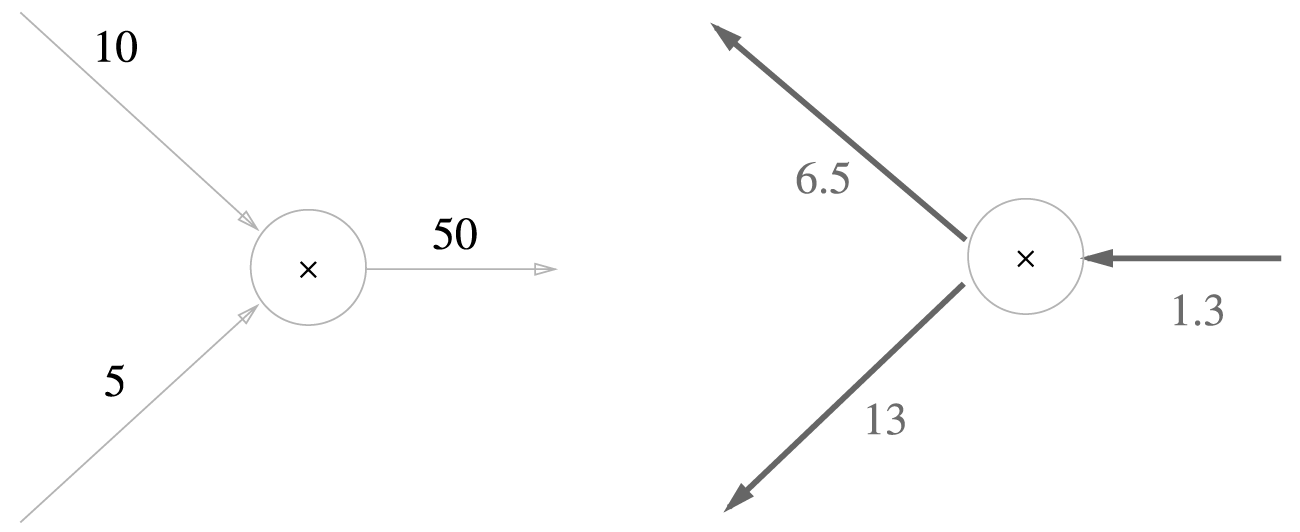

In [31]:
# 구체적인 예 식 :10  x 5 = 50 
# 역전파 때 상류에서 1.3 값이 전달 된다면 
# 다음 계산 그래프로 그려진다[그림5-13]
# 즉 1.3 X 5 = 6.5, 1.3 X 10 = 13
# 덧셈의 역전파는 상류값을 그대로 전달해서 순방향 입력 신호의 값은 필요하지 않다.
# 그러나 곱셈의 역전파는 순방향 입력 신호의 값이 필요
# "그래서 곱셈 노드를 구현할때는 순전파의 입력 신호를 변수에 저장해둔다."
Image("images/fig 5-13.png")

### 5.3.3 사과 쇼핑의 예
* 사과의 가격, 사과의 개수, 소비세라는 세 변수 각각이 
* 최종 금액에 어떻게 영향을 주느냐를 풀어보자 
  1. '사과 가격에 대한 지불 금액의 미분'
  2. '사과 개수에 대한 지불 금액의 미분'
  3. '소비세에 대한 지불 금액의 미분'

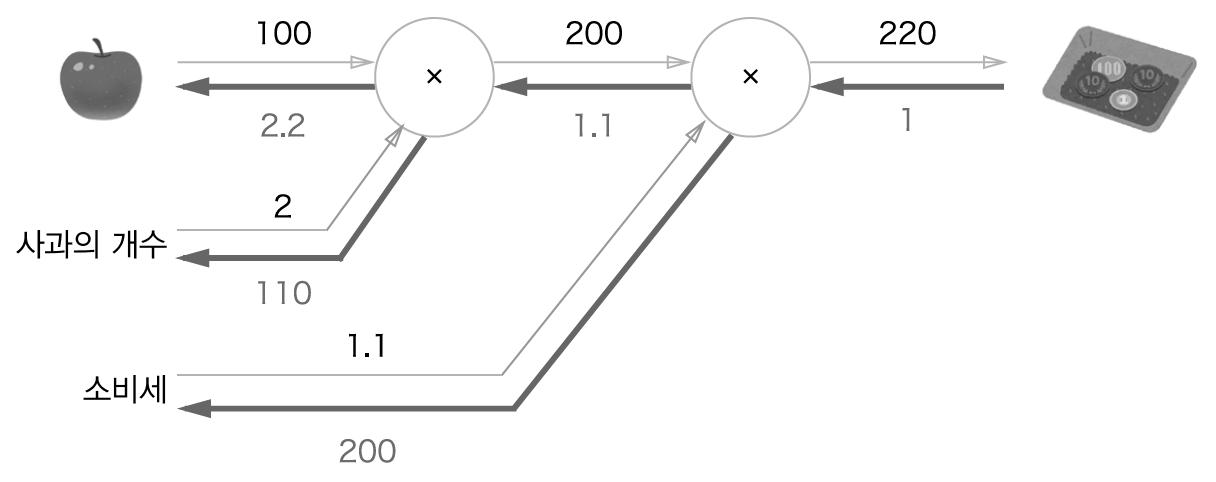

In [3]:
# 위 계산 그래프의 역전파를 사용해서 풀면 
# [그림 5-14]
Image("images/fig 5-14.png")
#  곱셈 노드의 역전파에서는 입력 신호를 서로 바꿔서 하류로 전달
#

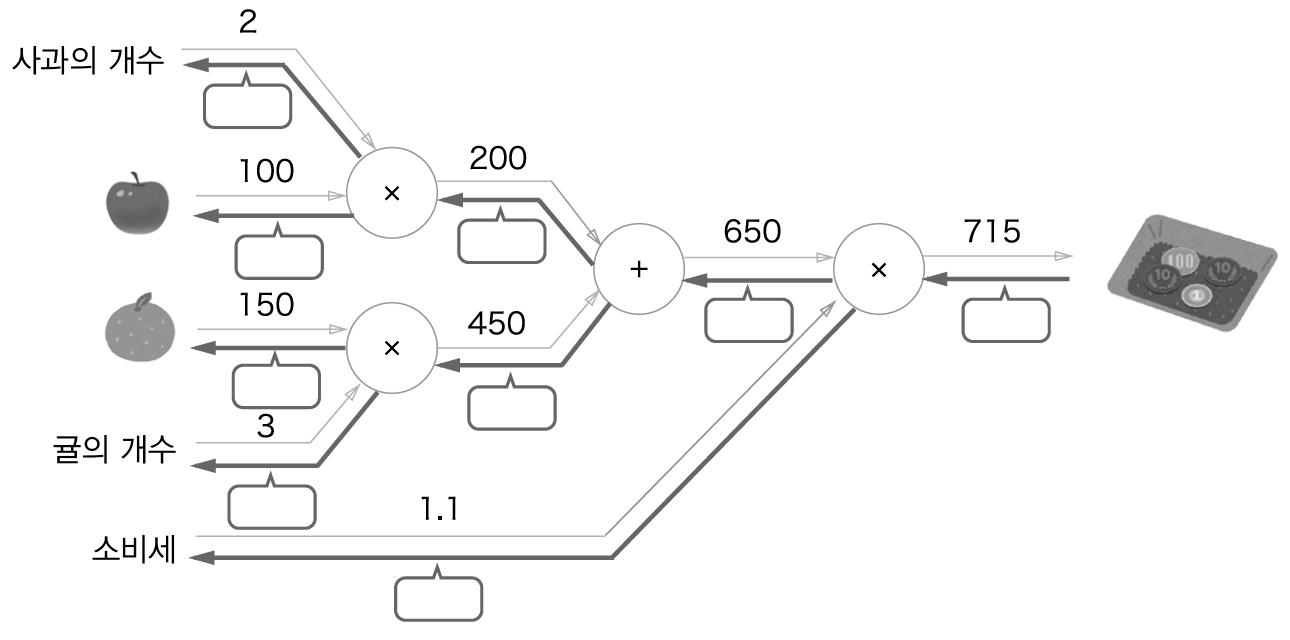

In [4]:
# '사과오하 귤 쇼핑'의 역전파를 풀어보자 
Image("images/fig 5-15.png")

## 5.4 단순한 계층 구현하기 
* '사과 쇼핑'예를 파이썬 구현 하기
* 곱셈 노드 'MulLayer'
* 덧셈 노드 'AddLayer'
* '계층' : 신경망의 기능 단위
* Sigmoid(시그모이드 함수), Affine(행렬 곱)등 기능을 계층 단위로 구현 

### 5.4.1 곱셈 계층
* 모든 계층은 forward(),backward()라는 공통의 메서드(인터페이스)를 갖도록 구현

In [5]:
## 곱셈 계층(MulLayer) 구현
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    
    def backward(self, dout):
        dx = dout * self.y # x와 y를 바꾼다.
        dy = dout * self.x
        
        return dx,dy

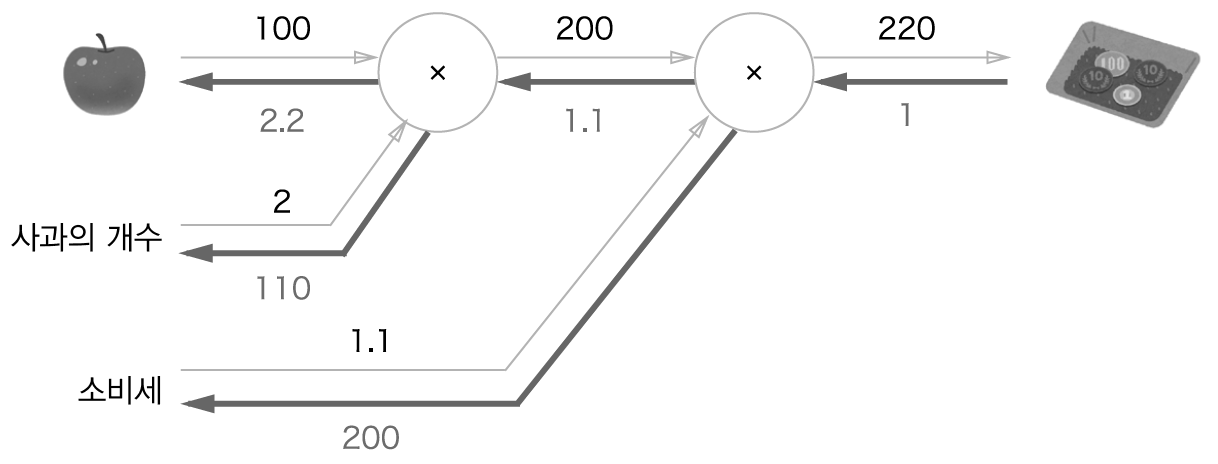

In [6]:
# 사과 2개 구입 계산 프로그램을 구현해보자
Image("images/fig 5-16.png")

In [7]:
# 위 계산 그래프의 값을 구하는 프로그램 구현
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(price)

220.00000000000003


In [8]:
# 역전파
dprice=1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax) # 2.2 110 200

2.2 110.00000000000001 200


* backward() 호출 순서는 forward()와 반대
* backward()가 받는 인수는 '순전파의 출력에 대한 미분'값
* mul_apple_layer는 순전파때는 apple_price를 출력합니다만,
* 역전파 때는 apple_price의 미분 값인 dapple_price를 인수로 받음

### 5.4.2 덧셈 계층

In [10]:
# 덧셈 노드인 덧셈 계층 구현
class AddLayer:
    def __init__(self):
        pass      # 아무 일도 하지 않음
    
    def forward(self, x,y):
        out = x + y   
        return out
    
    # 상류에서 내려온 미분(dout)을 그대로 하류로 전달 
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1  
        return dx, dy

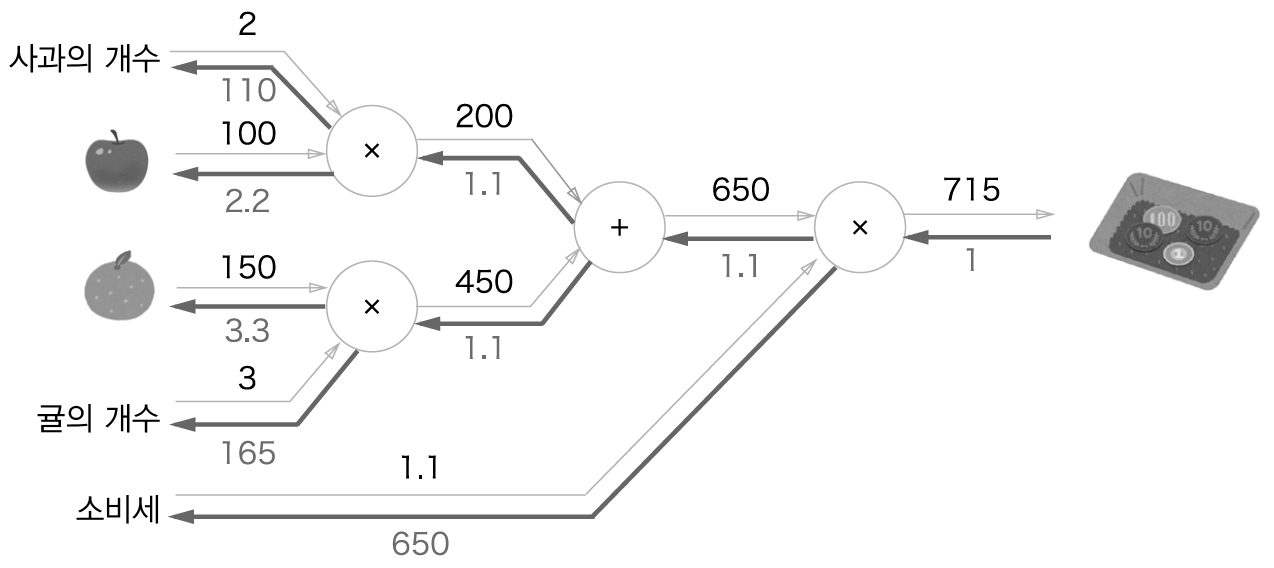

In [12]:
Image("images/fig 5-17.png")

In [13]:
# [그림 5-17]의 계산 그래프를 파이썬으로 구현하기
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

#계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple,apple_num)
orange_price = mul_orange_layer.forward(orange,orange_num)
all_price = add_apple_orange_layer.forward(apple_price,orange_price)
price = mul_tax_layer.forward(all_price,tax)

# 역전파
dprice = 1
dall_price,dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
110.00000000000001 2.2 3.3000000000000003 165.0 650


## 5.5 활성화 함수 계층 구현하기
* 활성화 함수 구현
  1. ReLU
  2. Sigmoid

### 5.5.1 ReLU 계층

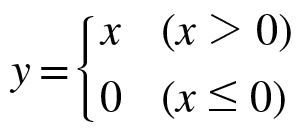

In [14]:
# ReLU의 수식
Image("images/e 5.7.png")

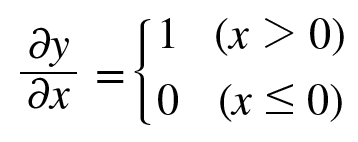

In [15]:
# 위식에서 x에 대한 y의 미분은 다음과 같다.
Image("images/e 5.8.png")

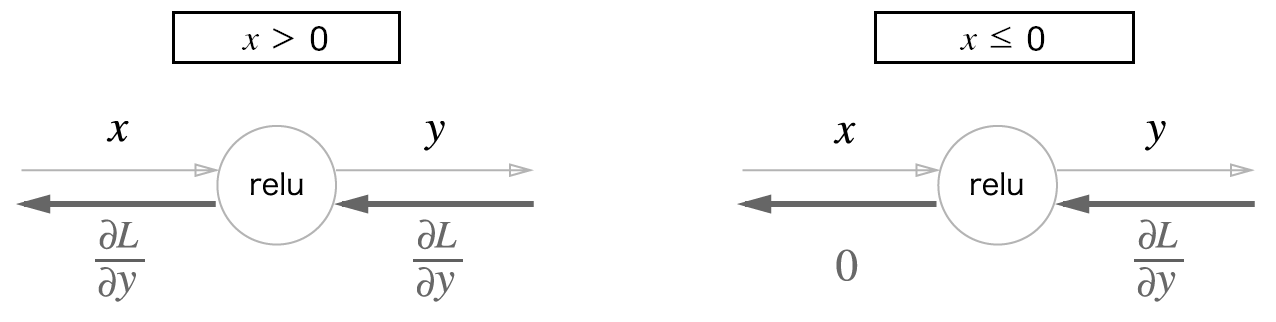

In [16]:
# ReLU 계층의 계산 그래프
Image("images/fig 5-18.png")

In [ ]:
# ReLU 계층 구현하기 
# 신경망 계층의 forward()와 backward()함수는  넘파이 배열을 인수로 받게 만든다.
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = ( x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

In [2]:
import numpy as np
x = np.array([1,-1, 3, -2, -1, 4, 5])
mask = ( x <=0)
mask

array([False,  True, False,  True,  True, False, False])

In [26]:
import numpy as np
x=np.array([[1.0, -0.5],[-2.0, 3.0]])
print(x)
mask = (x <= 0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### 5.5.2 Sigmoid 계층

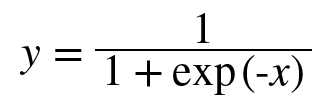

In [27]:
# 시그모이드 함수식
Image("images/e 5.9.png")

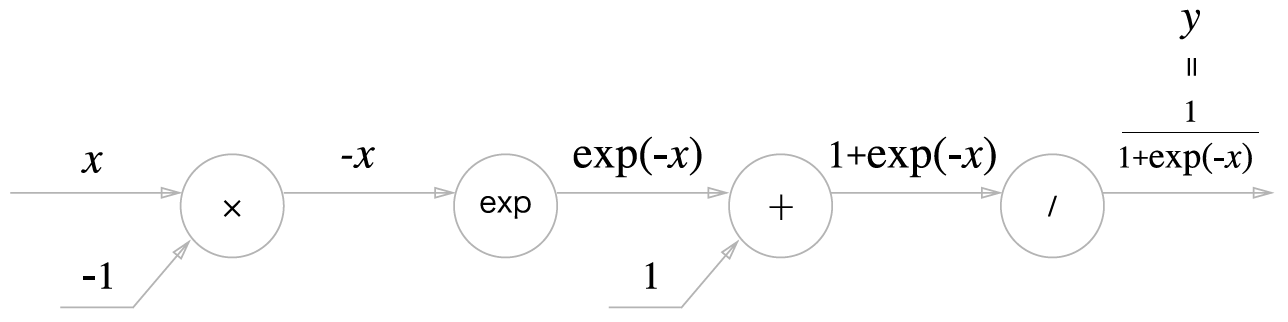

In [28]:
# 시그모이드 함수식을 계산 그래프로 변환
Image("images/fig 5-19.png")

### 1단계
* 새로운 노드 추가 'exp', '/'
* '/' 노드는 y = 1/x

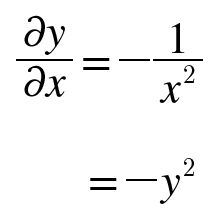

In [32]:
Image("images/e 5.10.png")
# 즉 역전파 때는 상류에서 흘러온 값에 -y**2을 곱해서 하류로 전달 

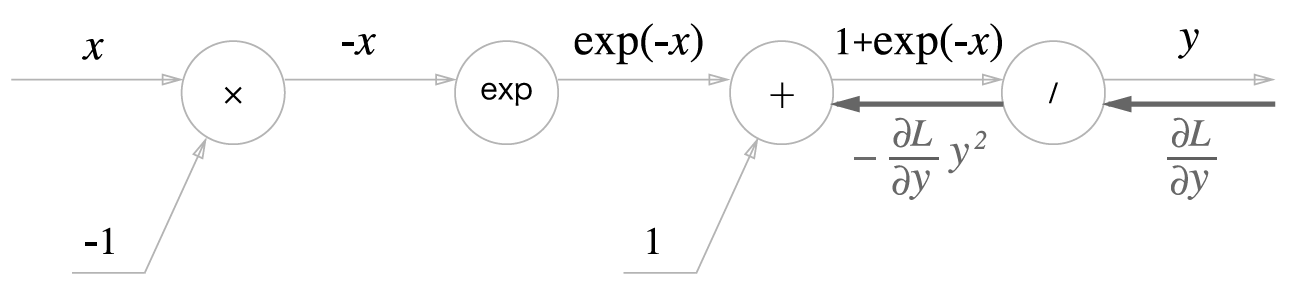

In [31]:
# 위 미분값을 적용한 역전파 계산 그래프
Image("images/fig 5-19(1).png")

### 2 단계
* '+' 노드는 상류의 값을 여과 없이 하류로 전달 

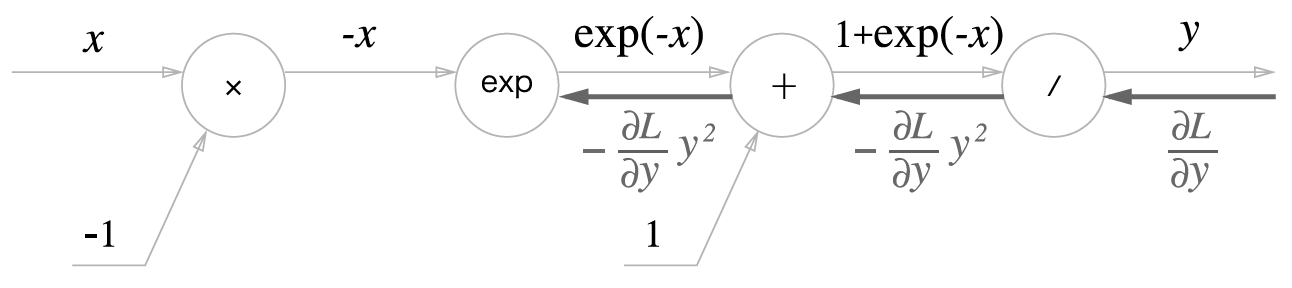

In [33]:
# 계산 그래프
Image("images/fig 5-19(2).png")

### 3 단계
* 'exp' 노드는 y=exp(x) 연산 수행
* 상류의 값에 순전파 때의 출력을 곱해 하류로 전달 

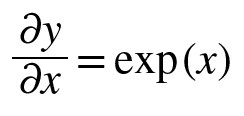

In [34]:
# 위 식의 미분은 
Image("images/e 5.11.png")

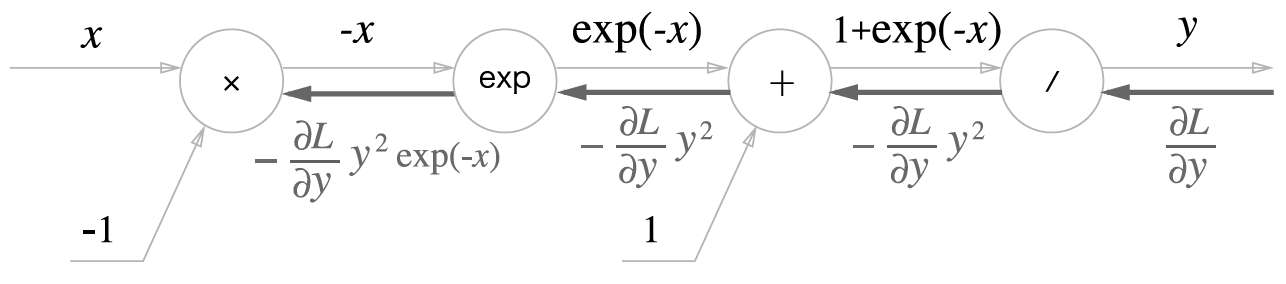

In [2]:
# 계산 그래프에서 상류의 값에 순전파 때의 출력을 곱해 하류로 전파
Image("images/fig 5-19(3).png")

### 4 단계
* 'x(곱)' 노드는 순전파 때의 값을 '서로 바꿔' 곱합값

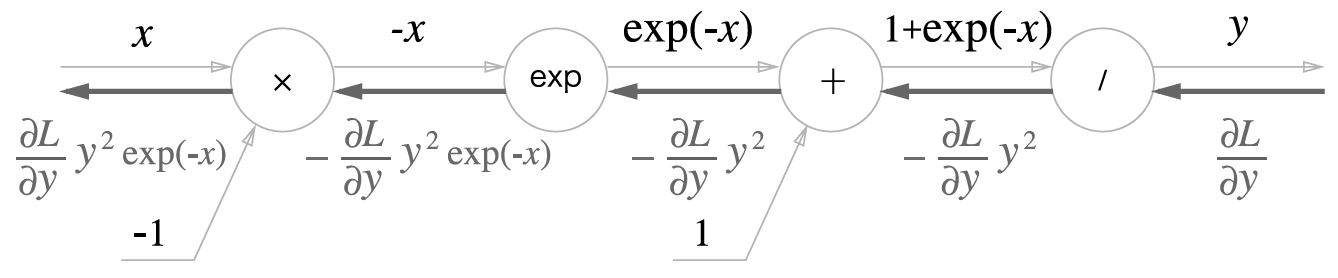

In [4]:
Image("images/fig 5-20.png")
#최종 x 변수의 변화에 따른 z 변수의 변화량을 구한 식(sigmoild 함수의 x에대한 z의 미분값)
#Sigmoid 계층의 역전파를 계산 그래프로 완성
#이식은 순전파의 입력 x와 출력 y만으로 계산가능 

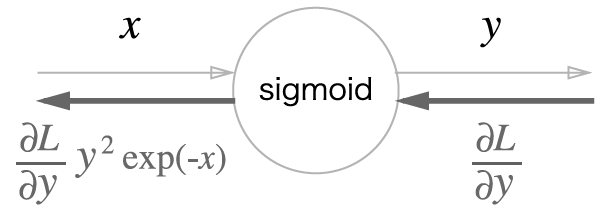

In [5]:
# Sigmoid 계층의 계산 그래프(간소화 버전)
Image("images/fig 5-21.png")

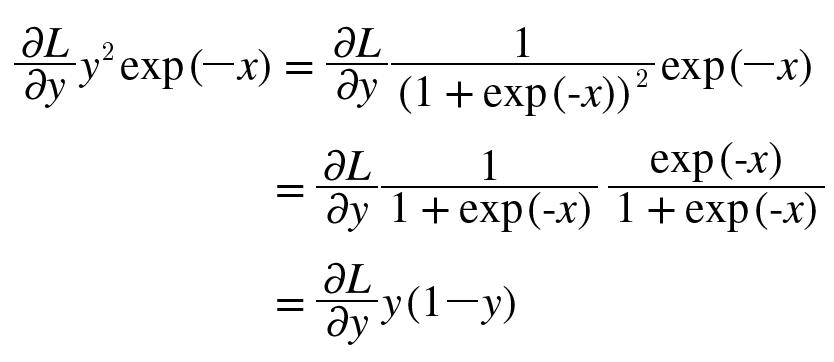

In [6]:
# sigmoid 계층의 역전파정리
Image("images/e 5.12.png")
# 이처럼 Sigmoid 계층의 역전파는 순전파의 출력(y)만으로 계산할 수 있다.

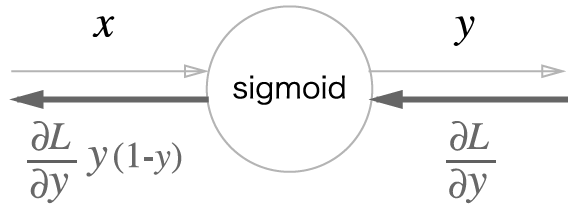

In [7]:
# Sigmoid 계층의 계산 그래프: 순전파의 출력y만으로 역전파를 계산 할 수 있다.
Image("images/fig 5-22.png")

In [9]:
# Sigmoid 계층을 소스로 구현
# 이 구현에서는 순전파의 출력을 인스턴스 변수 out에 보관했다가
# 역전파 계산 때 그 값을 사용
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out =  1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout *(1.0 - self.out) * self.out
        return dx

## 5.6 Affine/Softmax 계층 구현하기

### 5.6.1 Affine 계층
* 신경망의 순전파에서는 가중치 신호의 총합을 계산하기
* 위해서 행렬의 곱(np.dot())사용

In [18]:
# 행렬의 곱 계산은 대응하는 차원의 원소 수를 일치시키는 게 핵심이다.
import numpy as np
X = np.random.rand(2)     # 입력
W = np.random.rand(2,3)   # 가중치
B = np.random.rand(3)     # 편향


print(X.shape, W.shape, B.shape) 

print(X)
print(W)
print(B)
Y = np.dot(X,W) + B
print(Y.shape)
Y



(2,) (2, 3) (3,)
[0.15658129 0.90423056]
[[0.85100432 0.47525366 0.81851358]
 [0.83094684 0.24089277 0.90040952]]
[0.04474126 0.65649205 0.20102384]
(3,)


array([0.92936015, 0.94873049, 1.14336555])

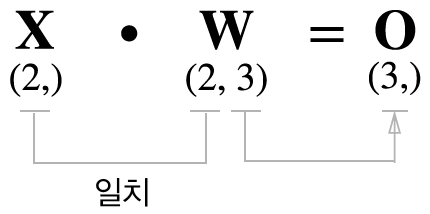

In [17]:
# 행렬의 곱 계산은 대응하는 차원의 원소 수를 일치시키는 게 핵심이다.
Image("images/fig 5-23.png")


 * 신경망의 순전파 때 수행하는 행렬의 곱은
 * 기하학에서는 어파인 변환(affine transformation)이라고 한다.
 * 어파인 변환을 수행하는 처리를 'Affine 계층'이라고 한다.

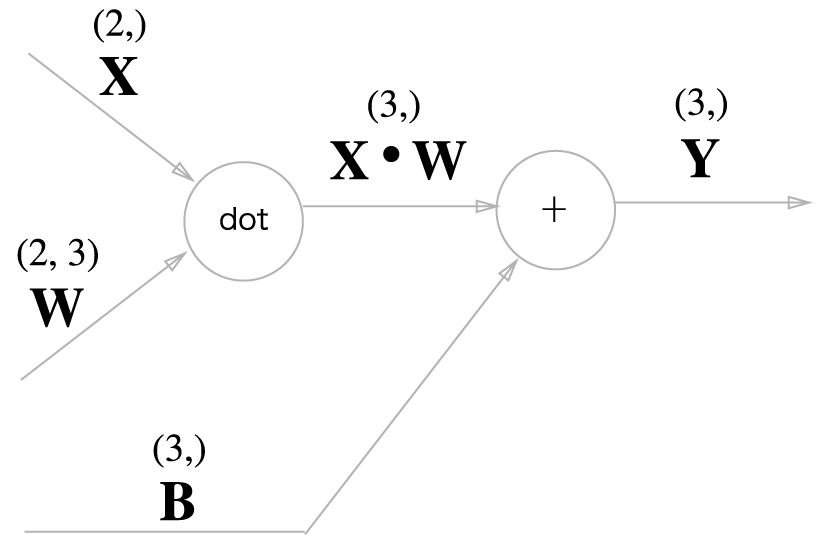

In [19]:
# 위에서 수행한 계산(행렬의 곱과 편향의 합)을 계산 그래프로 그려보면
# Affine 계층의 계산 그래프 
# X,W,B가 행렬(다차원 배열)
Image("images/fig 5-24.png")
# X의 형상 (2,)
# W의 형상(2,3)
# X * W의 형상(3,)
# B의 형상(3,)
# Y의 형상(3,)


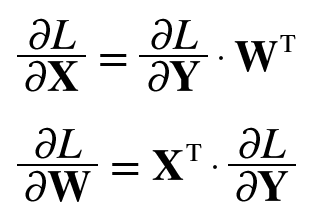

In [20]:
# 위 계산그래프의 역전파에 대해서 생각해보면
Image("images/e 5.13.png")

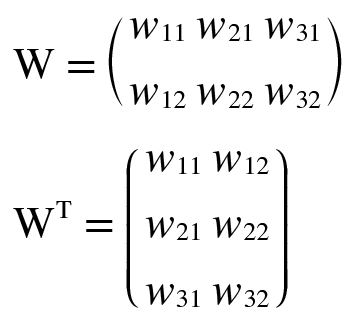

In [21]:
# 위 식에서 W(T)의 T는 전치행렬을 의미하며
# 전치행렬은 W의(i,j)위치의 원소를 
# (j,i) 위치로 바꾼것을 말한다.
# W의 형상이(2,3)이었다면 전치행렬 W(T)의 형상은(3,2)가 된다.
Image("images/e 5.14.png")

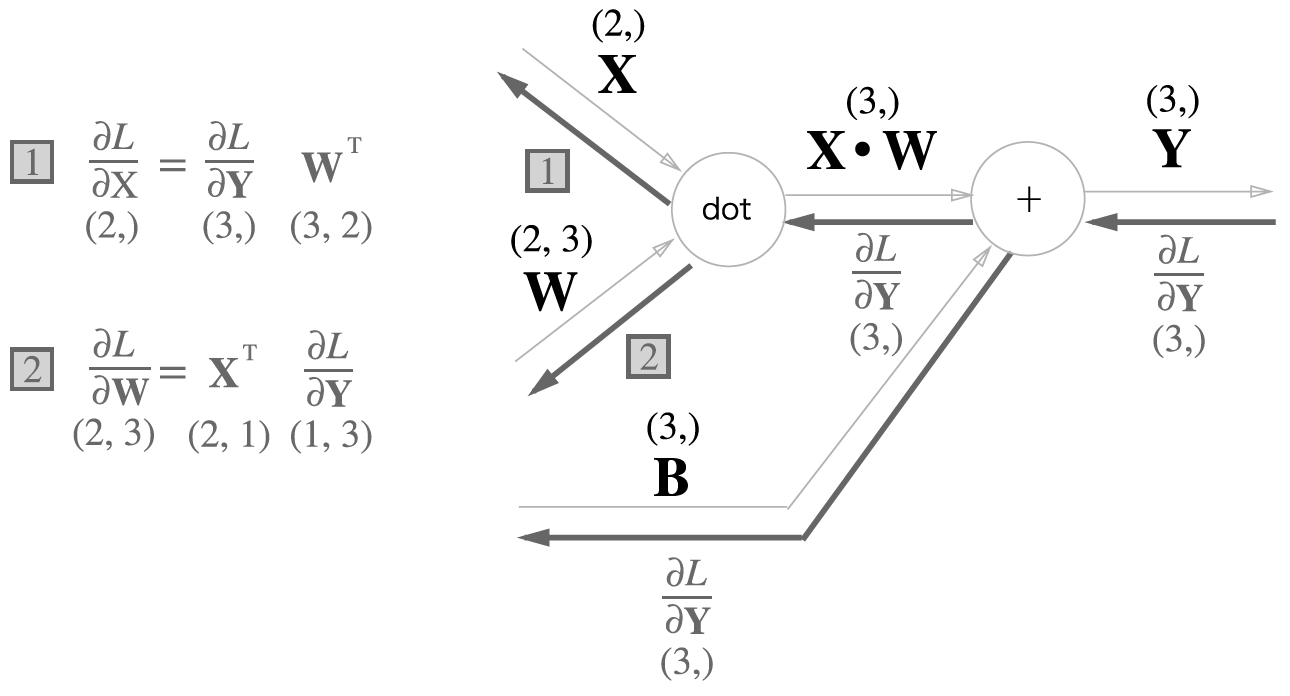

In [23]:
# [식 5.13]을 바탕으로 계산 그래프의 역전파를 구해보자
# Affine 계층의 역전파 : 변수가 다차원 배열임에 주의
# 역전파에서의 변수 형상은 해당 변수명 아래에 표기
Image("images/fig 5-25.png")

In [45]:
W = np.arange(1,7,1).reshape(2,3)   # 가중치
print(W.shape)
B = np.arange(1,4,1)
print(B.shape)
print(np.dot(W,B))
print(np.dot(B,W.T))

# B = np.random.rand(3)
# print(W.shape)
# print(B.shape)
# print(np.dot(W,B))
# print(np.dot(B,W.T))

(2, 3)
(3,)
[14 32]
[14 32]


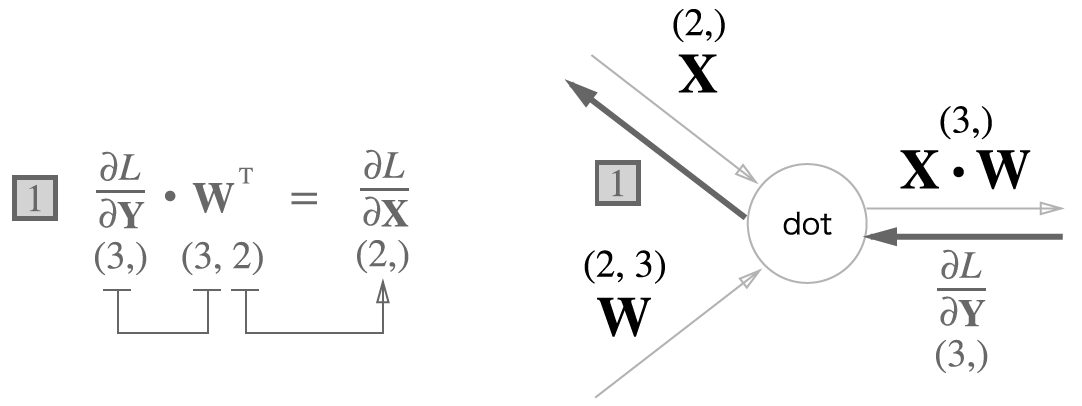

In [32]:
# 행렬 곱('dot' 노드)의 역전파는 행렬의 대응하는 
# 차원의 원소 수가 일치하도록 곱을 조립하여 구할 수 있다.
Image("images/fig 5-26.png")

### 5.6.2 배치용 Affine 계층 

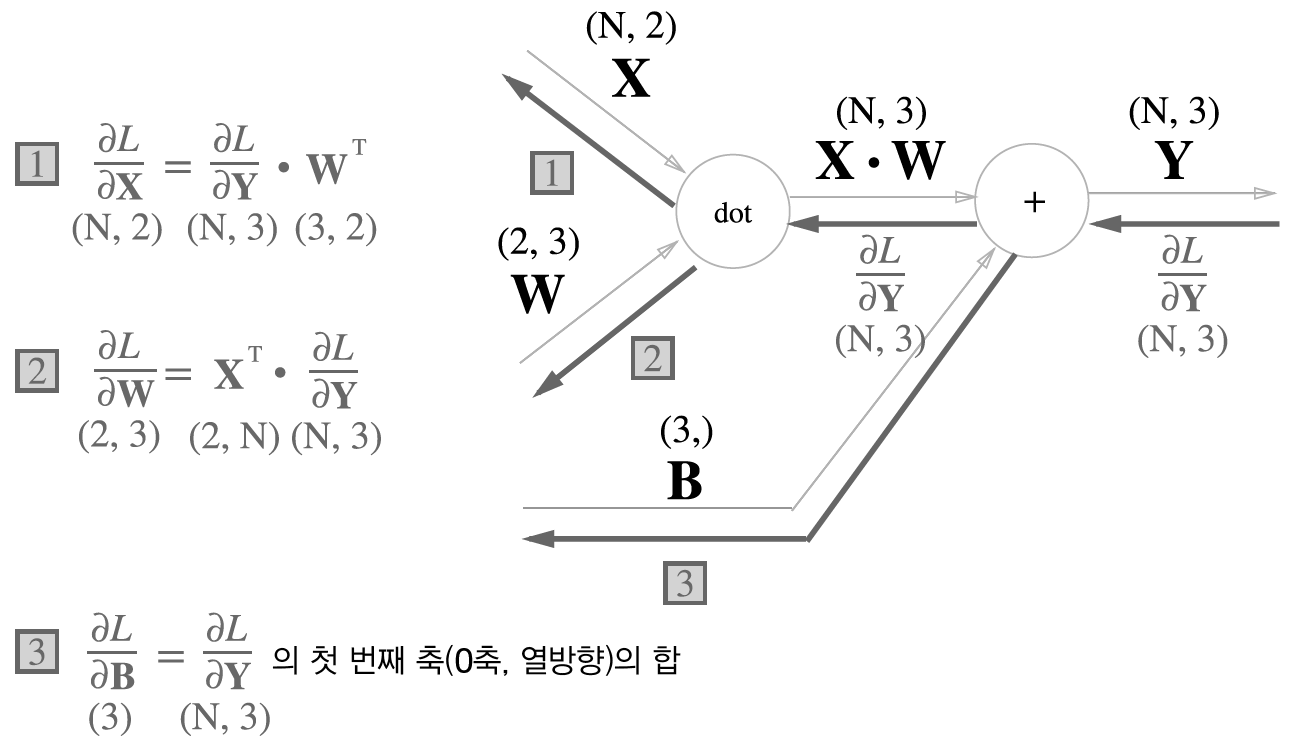

In [46]:
# 데이터 N 개를 묶은 X의 순전파하는 경우(묶은 데이터를 '배치')
Image("images/fig 5-27.png")

In [4]:
import numpy as np
X_dot_W = np.array([[0,0,0], [10,10,10]])
B = np.array([1,2,3])
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

In [5]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.w = None
        self.dw = None
        self.db = None
        
    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)